In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch, time
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [53]:
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

In [2]:
transform = transforms.ToTensor()

In [3]:
mnist_train = datasets.MNIST(root="../PYTORCH_NOTEBOOKS/Data/",train=True,download=True,transform=transform)
mnist_test = datasets.MNIST(root="../PYTORCH_NOTEBOOKS/Data/",train=False,download=True,transform=transform)

In [4]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../PYTORCH_NOTEBOOKS/Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../PYTORCH_NOTEBOOKS/Data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader(dataset=mnist_train,batch_size=50,shuffle=True)
test_loader = DataLoader(dataset=mnist_test,batch_size=50,shuffle=False)

In [7]:
# 1 COLOR CHANNEL, 6 FILTERS (OUTPUT CHANNELS), 3by3 KERNEL, STRIDE or STEP SIZE = 1
conv1 = nn.Conv2d(in_channels=1,out_channels=8,kernel_size=3,stride=1)
# 6 INPUT FILTERS FROM CONV2D 1, 16 FILTERS (ARBITRARY CHOICE), 3by3 KERNEL, STRIDE=1
conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1)

In [8]:
for i, (X_train, y_train) in enumerate(mnist_train):
    break

In [9]:
X_train.shape

torch.Size([1, 28, 28])

In [10]:
X_train[0].view(1,1,28,28) # 4D image -> another dimension 1 of batch size, 4D(batch of 1 image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
x = X_train.view(1,1,28,28)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
x = F.relu(conv1(x))
x.shape

torch.Size([1, 8, 26, 26])

In [13]:
x = F.max_pool2d(x,kernel_size=2,stride=2)
x.shape

torch.Size([1, 8, 13, 13])

In [14]:
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [15]:
x = F.max_pool2d(x,kernel_size=2,stride=2)
x.shape

torch.Size([1, 16, 5, 5])

In [16]:
11/2

5.5

In [17]:
((28-2)/2-2)/2

5.5

In [18]:
x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [19]:
class ConvolutionalNeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,8,3,1)
        self.conv2 = nn.Conv2d(8,16,3,1)
        self.fc1 = nn.Linear(5*5*16,200)
        self.fc2 = nn.Linear(200,100)
        self.fc3 = nn.Linear(100,10)

    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,kernel_size=2,stride=2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,kernel_size=2,stride=2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)

In [20]:
torch.manual_seed(68)

model = ConvolutionalNeuralNetwork()
model

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [21]:
total_parameters = 0

for param in model.parameters():
    print(param.numel())
    total_parameters += param.numel()

print("Total parameters of the CNN model:",total_parameters)

72
8
1152
16
80000
200
20000
100
1000
10
Total parameters of the CNN model: 102558


In [22]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

In [23]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [24]:
start_time = time.time()

epochs = 10

# TRACKERS
train_losses = []
test_losses = []
train_correct_predictions = []
test_correct_predictions = []

for i in range(epochs):
    train_correct = 0
    test_correct = 0

    # TRAIN
    for batch_no, (X_train, y_train) in enumerate(train_loader):
        batch_no += 1
        y_pred = model(X_train) # No need to flatten
        loss = criterion(y_pred,y_train)
        predictions = torch.max(y_pred.data,1)[1]
        batch_correct_predictions = (predictions == y_train).sum()
        train_correct += batch_correct_predictions

        # Update model parameters (W&b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_no % 600 == 0:
            print(f"Epoch {i} Batch {batch_no} Loss {loss.item()}")

    train_losses.append(loss.item())
    train_correct_predictions.append(train_correct.item())

    # TEST
    with torch.no_grad():
        for batch_no, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predictions = torch.max(y_val,1)[1]
            test_correct += (predictions == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss.item())
    test_correct_predictions.append(test_correct.item())

print(f"Time elapsed in CNN model training: {(time.time()-start_time)/60} minutes")

Epoch 0 Batch 600 Loss 0.15146192908287048
Epoch 0 Batch 1200 Loss 0.08234506845474243
Epoch 1 Batch 600 Loss 0.08752093464136124
Epoch 1 Batch 1200 Loss 0.05201898142695427
Epoch 2 Batch 600 Loss 0.006896240171045065
Epoch 2 Batch 1200 Loss 0.06471124291419983
Epoch 3 Batch 600 Loss 0.06404715776443481
Epoch 3 Batch 1200 Loss 0.02094435878098011
Epoch 4 Batch 600 Loss 0.010645116679370403
Epoch 4 Batch 1200 Loss 0.002298383042216301
Epoch 5 Batch 600 Loss 0.020882003009319305
Epoch 5 Batch 1200 Loss 0.0010515660978853703
Epoch 6 Batch 600 Loss 0.0008741869824007154
Epoch 6 Batch 1200 Loss 0.005051874555647373
Epoch 7 Batch 600 Loss 0.0007083700620569289
Epoch 7 Batch 1200 Loss 0.0528007447719574
Epoch 8 Batch 600 Loss 0.00918267760425806
Epoch 8 Batch 1200 Loss 0.004556121304631233
Epoch 9 Batch 600 Loss 0.001180055900476873
Epoch 9 Batch 1200 Loss 0.0009209511918015778
Time elapsed in CNN model training: 4.660134601593017 minutes


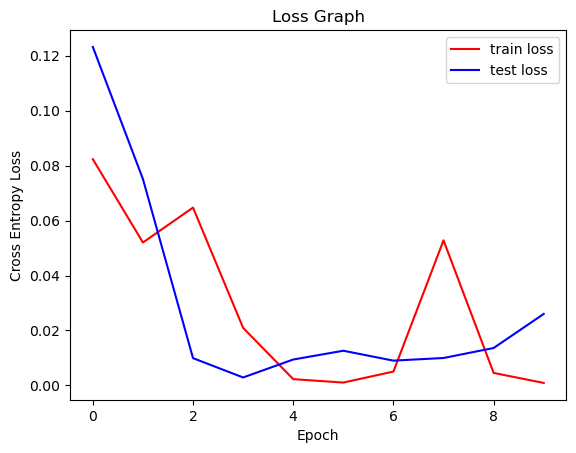

In [36]:
plt.plot(train_losses,'r',label='train loss')
plt.plot(test_losses,'b',label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Graph')
plt.legend();

In [31]:
train_accuracies = [x/600 for x in train_correct_predictions]
test_accuracies = [x/100 for x in test_correct_predictions]

In [32]:
train_accuracies

[90.34333333333333,
 97.57666666666667,
 98.315,
 98.695,
 98.90333333333334,
 99.12333333333333,
 99.25166666666667,
 99.35166666666667,
 99.42,
 99.515]

In [33]:
test_accuracies

[97.63, 98.4, 98.79, 98.79, 98.97, 98.97, 99.01, 98.94, 98.92, 98.53]

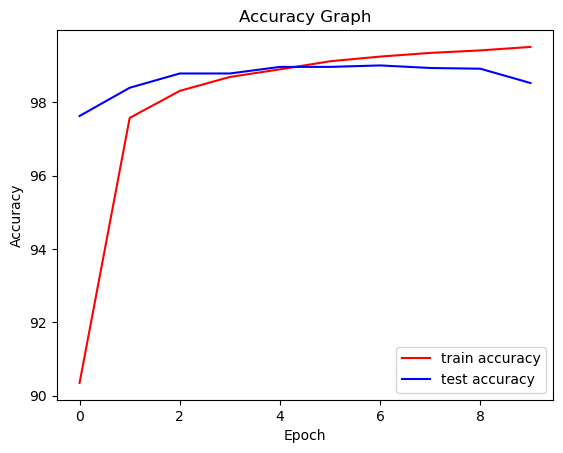

In [35]:
plt.plot(train_accuracies,'r',label='train accuracy')
plt.plot(test_accuracies,'b',label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [37]:
# TEST on UNSEEN data
test_data = DataLoader(dataset=mnist_test,batch_size=10000,shuffle=False)
test_data

In [38]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_data:
        y_val = model(X_test)
        predictions = torch.max(y_val,1)[1]
        correct += (predictions == y_test).sum()

In [46]:
print("Test accuracy:",np.round(correct.item()/len(mnist_test)*100,2))

Test accuracy: 98.53


In [54]:
print("Confusion Matrix:")
print(np.arange(0,10).reshape(1,10))
print()
print(confusion_matrix(predictions,y_test))

Confusion Matrix:
[[   0    1    2    3    4    5    6    7    8    9]]

[[ 969    2    0    0    0    2    2    0    1    0]
 [   0 1125    0    0    0    0    2    2    0    0]
 [   5    4 1029    2    2    0    0   40    3    0]
 [   0    1    1 1003    0   13    0    0    3    3]
 [   0    0    0    0  961    0    1    0    0    2]
 [   2    0    0    4    0  874    2    0    0    2]
 [   0    2    1    0    1    1  950    0    0    0]
 [   1    0    1    1    1    1    0  983    0    3]
 [   3    1    0    0    0    0    1    1  965    5]
 [   0    0    0    0   17    1    0    2    2  994]]


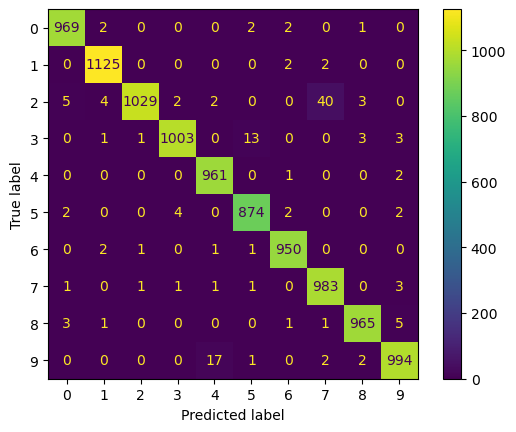

In [50]:
ConfusionMatrixDisplay.from_predictions(predictions,y_test)

In [55]:
print("Classification Report:")
print(classification_report(predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.99      1.00      0.99      1129
           2       1.00      0.95      0.97      1085
           3       0.99      0.98      0.99      1024
           4       0.98      1.00      0.99       964
           5       0.98      0.99      0.98       884
           6       0.99      0.99      0.99       955
           7       0.96      0.99      0.97       991
           8       0.99      0.99      0.99       976
           9       0.99      0.98      0.98      1016

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



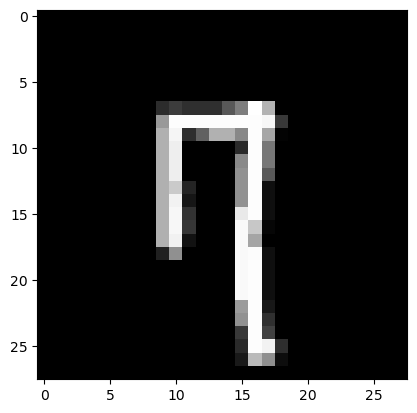

In [62]:
plt.imshow(mnist_test[2024][0].reshape(28,28),cmap='gray')

In [64]:
model.eval()

with torch.no_grad():
    test_prediction = model(mnist_test[2024][0].view(1,1,28,28))    

In [67]:
test_prediction.argmax().item()

7

In [72]:
def test_on_random_image():
    random_img_idx = np.random.randint(low=0,high=len(mnist_test))
    
    plt.imshow(mnist_test[random_img_idx][0].reshape(28,28)) # Display the random image

    model.eval() # Set model to evaluation phase
    
    with torch.no_grad():
        test_prediction = model(mnist_test[random_img_idx][0].reshape(1,1,28,28))
        
    print("Prediction:",test_prediction.argmax().item())

Prediction: 9


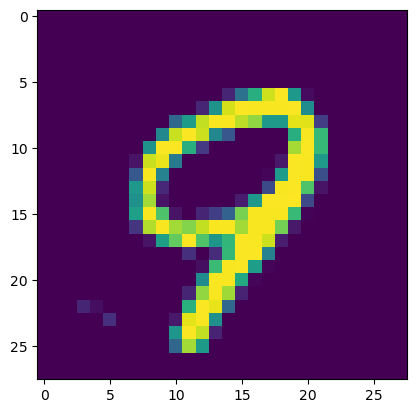

In [74]:
test_on_random_image()